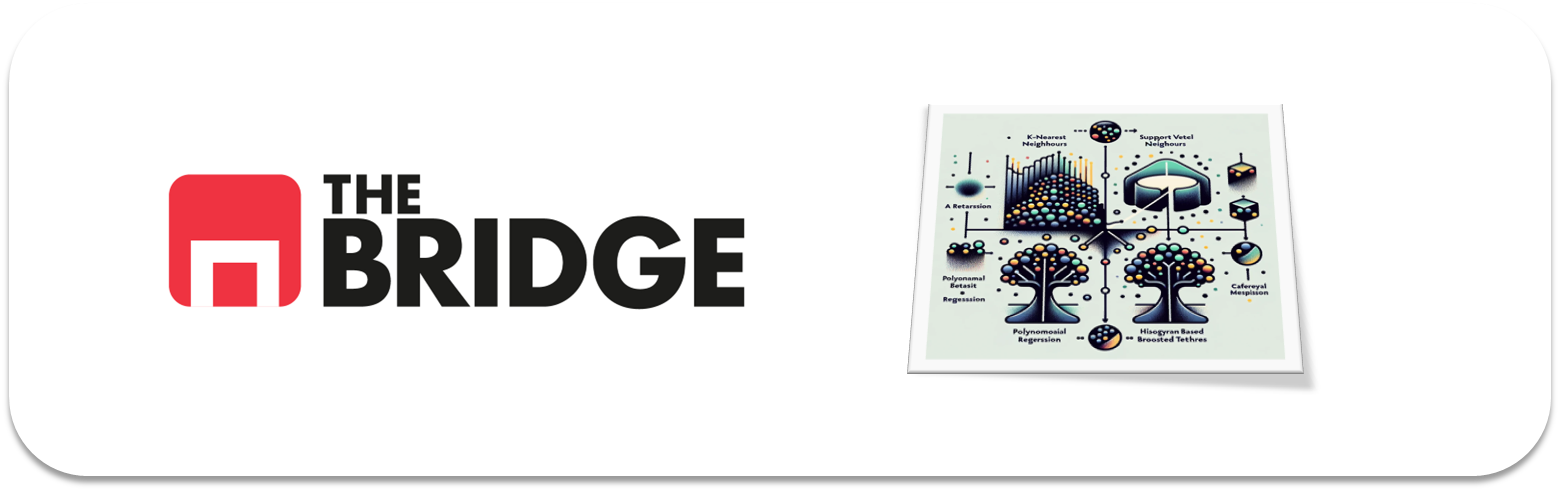

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, make_scorer, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import bootcampviztools as bt
import toolbox_ML

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df_banco = pd.read_csv("./data/credit_npo.csv")
toolbox_ML.describe_df(df_banco)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Tipo de Dato,int64,float64,int64,int64,float64,float64,int64,int64,int64,int64,float64
% Valores Nulos,0.0,0.0,0.0,0.0,0.0,5.75,0.0,0.0,0.0,0.0,1.41
Valores Únicos,2,10764,78,10,11547,4167,43,13,16,8,10
% Cardinalidad,0.02,85.86,0.62,0.08,92.1,33.24,0.34,0.1,0.13,0.06,0.08


In [3]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
df_banco.head(3)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0


### -SeriousDlqin2yrs: 
Columna que refleja si se ha experimentado un incumplimiento grave en el pago en los últimos 2 años.

### -RevolvingUtilizationOfUnsecuredLines: 
Proporción de uso de líneas de crédito no aseguradas.

### -NumberOfTime30-59DaysPastDueNotWorse: 
Número de veces que un individuo ha retrasado un pago entre 30 y 59 días.

### -DebtRatio: 
Relación deuda-ingresos, calculada como el total de deudas mensuales dividido por los ingresos mensuales.

### -MonthlyIncome: 
Ingreso mensual del individuo. 
Nota: Algunos valores pueden ser nulos (NaN), lo que indica que en ciertos casos no se tiene el dato de ingreso mensual.

### -NumberOfOpenCreditLinesAndLoans: 
Número total de líneas de crédito y préstamos abiertos.

### -NumberOfTimes90DaysLate: 
Número de veces que un individuo ha estado retrasando en el pago 90 días o más.

### -NumberRealEstateLoansOrLines: 
Número de préstamos o líneas de crédito que el individuo tiene.

### -NumberOfTime60-89DaysPastDueNotWorse: 
Número de veces que un individuo ha estado  retrasando en el pago entre 60 y 89 días, pero no más de eso.

### -NumberOfDependents: 
Número de dependientes que tiene el individuo (como hijos u otras personas a su cargo).
Nota: Algunos valores pueden ser nulos (NaN), lo que indica que en ciertos casos no se tiene el dato de numero de personas dependientes.


In [5]:
df_banco.NumberOfDependents.value_counts(dropna=False).nunique

<bound method IndexOpsMixin.nunique of NumberOfDependents
0.0     6935
1.0     2384
2.0     1816
3.0      882
4.0      253
NaN      177
5.0       62
6.0       24
8.0        2
10.0       1
7.0        1
Name: count, dtype: int64>

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?
Problema de Clasificacion, Target =  SeriousDlqin2yrs

In [6]:
target =  "SeriousDlqin2yrs"

### #1.3
Pinta la distribución de frecuencias del target y coméntala

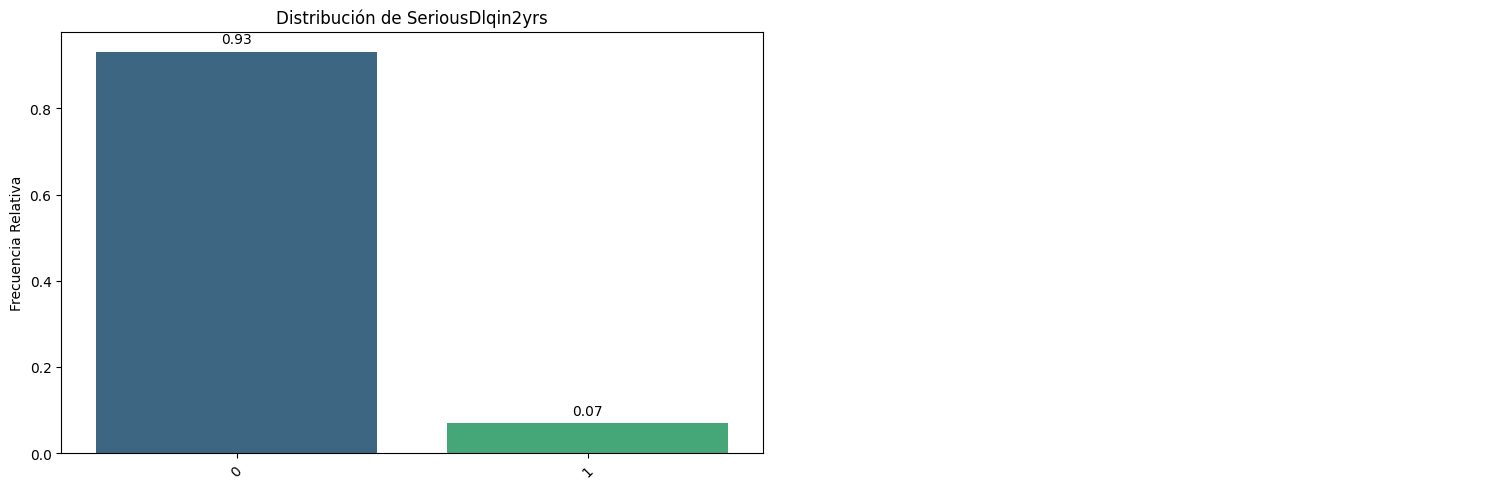

In [7]:
bt.pinta_distribucion_categoricas(df_banco, [target],relativa=True, mostrar_valores=True)

dataset claramente desequilibrado

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [8]:
"""
Primero imputaremos valores faltantes con la mediana, para poder devolver la tendencia centrarl en el caso de distribuciones sesgadas 
"""

imputar = SimpleImputer(strategy="median")
df_banco_bkp = df_banco.copy()
df_banco_bkp = pd.DataFrame(imputar.fit_transform(df_banco), columns=df_banco.columns.to_list())

In [9]:
df_banco_bkp. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  float64
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         12537 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  float64
 7   NumberOfTimes90DaysLate               12537 non-null  float64
 8   NumberRealEstateLoansOrLines          12537 non-null  float64
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  float64
 10  NumberOfDependents                    12537 non-null  float64
dtypes: float64(11)


In [10]:
toolbox_ML.tipifica_variables(df_banco_bkp,12,0.9)

,nombre_variable,tipo_sugerido
0,SeriousDlqin2yrs,Binaria
1,RevolvingUtilizationOfUnsecuredLines,Numerica Continua
2,age,Numerica Discreta
3,NumberOfTime30-59DaysPastDueNotWorse,Categórica
4,DebtRatio,Numerica Continua
5,MonthlyIncome,Numerica Continua
6,NumberOfOpenCreditLinesAndLoans,Numerica Discreta
7,NumberOfTimes90DaysLate,Numerica Discreta
8,NumberRealEstateLoansOrLines,Numerica Discreta
9,NumberOfTime60-89DaysPastDueNotWorse,Categórica


In [11]:
features = [col for col in df_banco_bkp.columns if col != 'SeriousDlqin2yrs']

features_num = [col for col in features if col != 'SeriousDlqin2yrs']

features_cat = ["NumberOfTime30-59DaysPastDueNotWorse","NumberOfTime60-89DaysPastDueNotWorse","NumberOfDependents"]

In [14]:
train_set, test_set = train_test_split(df_banco_bkp, test_size=0.20)

X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]



In [15]:
"""
Primero Comprobamos, el comportamiento base con un modelod e regresion logistica

"""

lr_bank = LogisticRegression(max_iter=1000)
lr_bank.fit(X_train,y_train)
y_pred_test = lr_bank.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      2355
         1.0       0.64      0.12      0.20       153

    accuracy                           0.94      2508
   macro avg       0.79      0.56      0.58      2508
weighted avg       0.93      0.94      0.92      2508



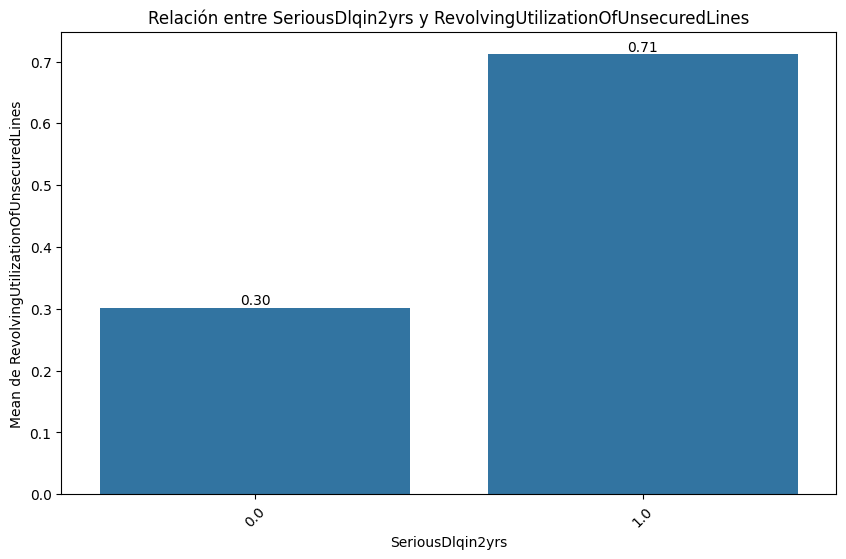

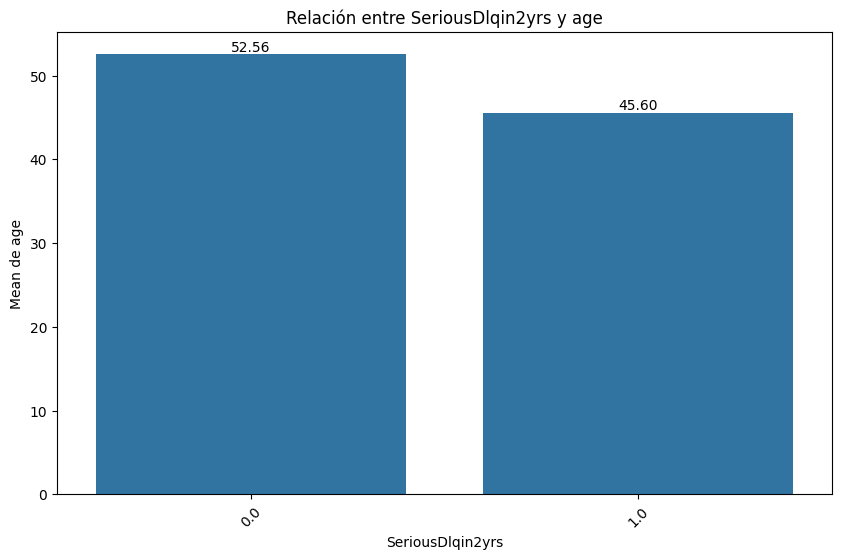

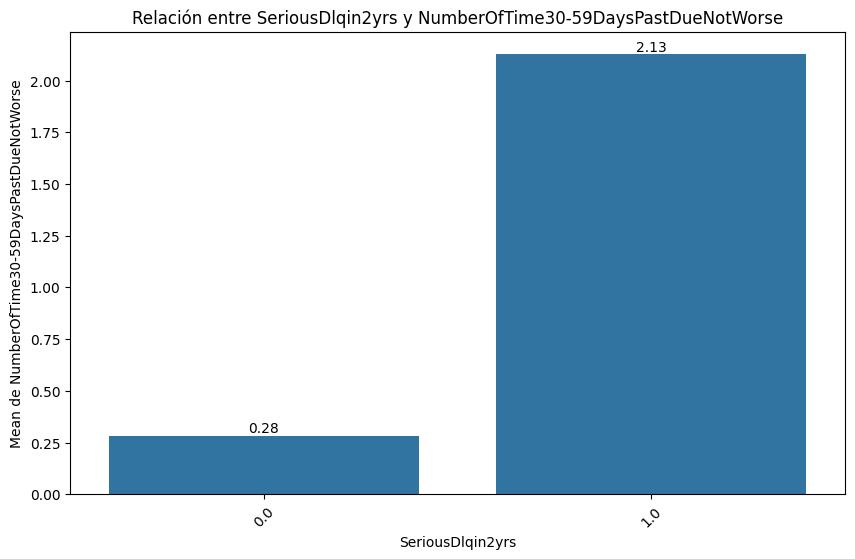

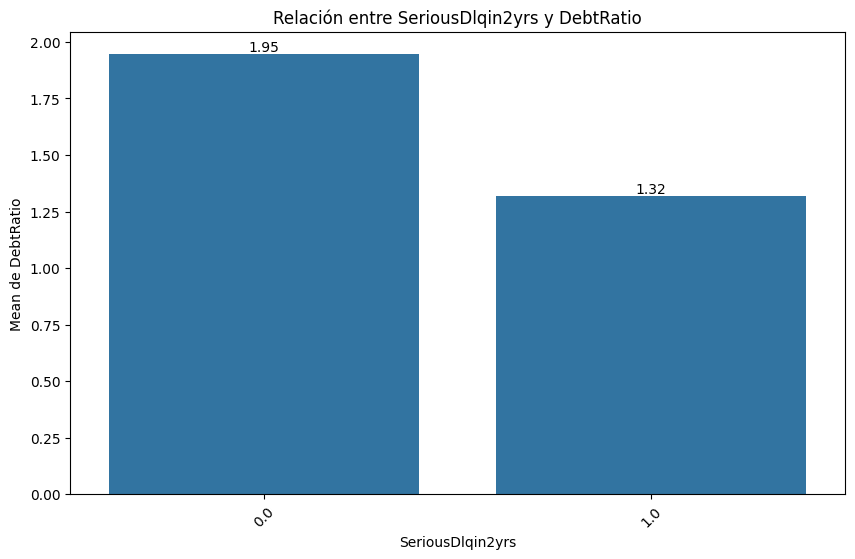

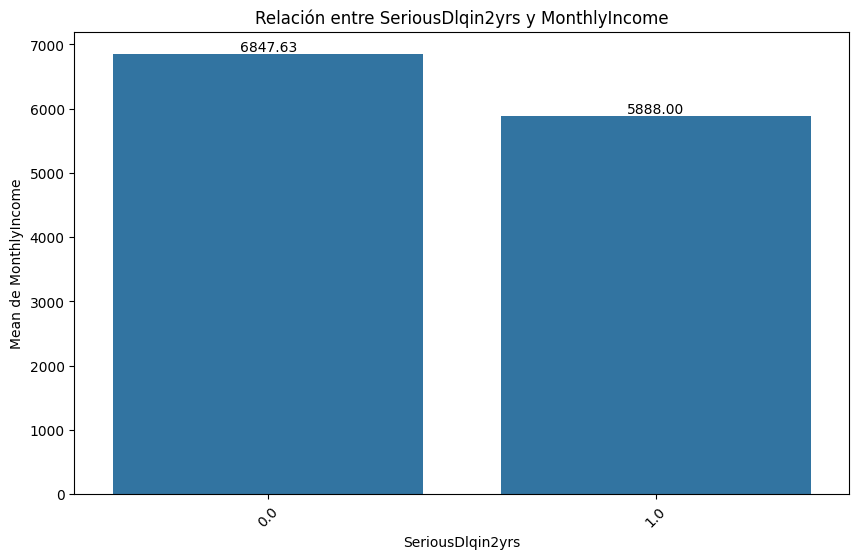

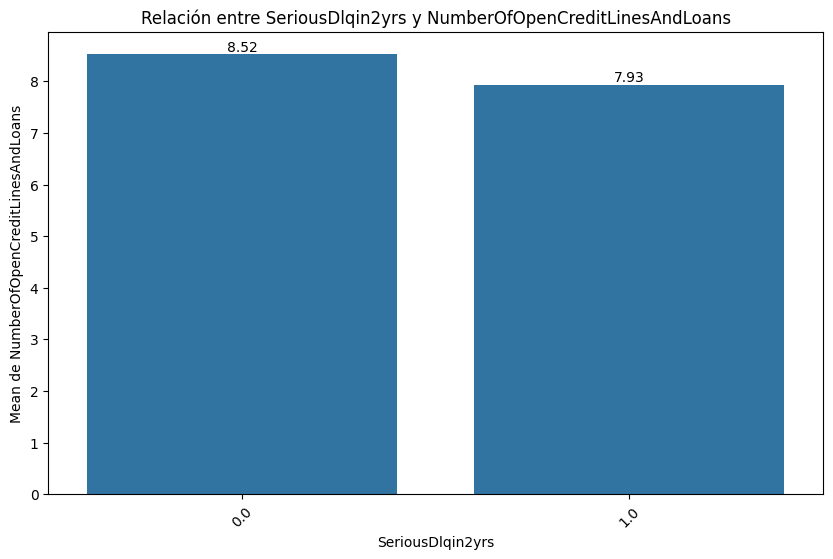

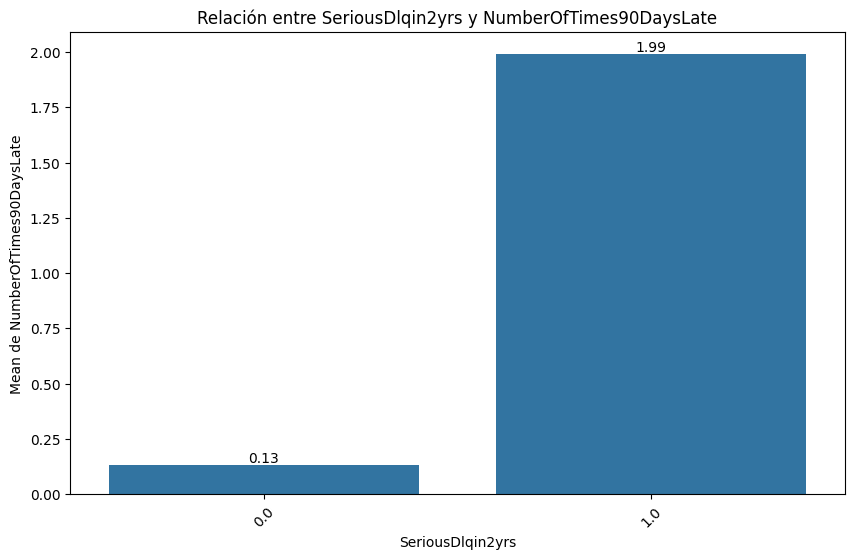

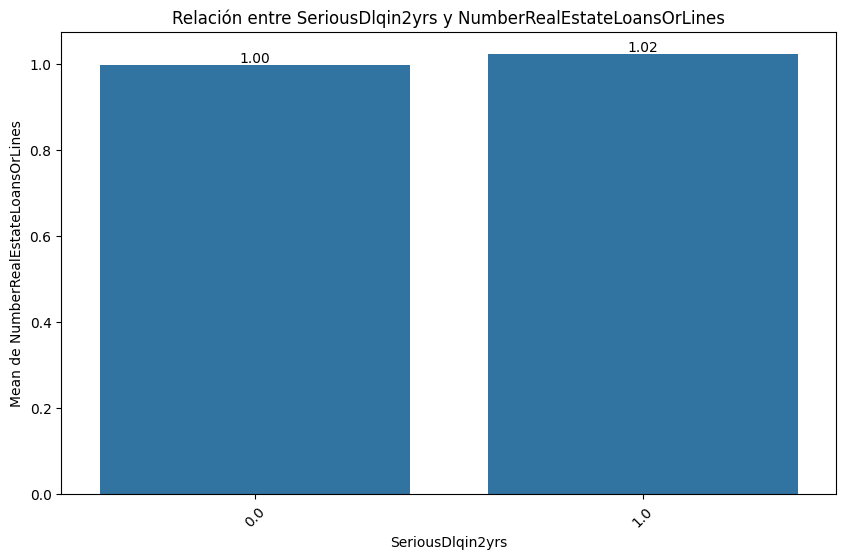

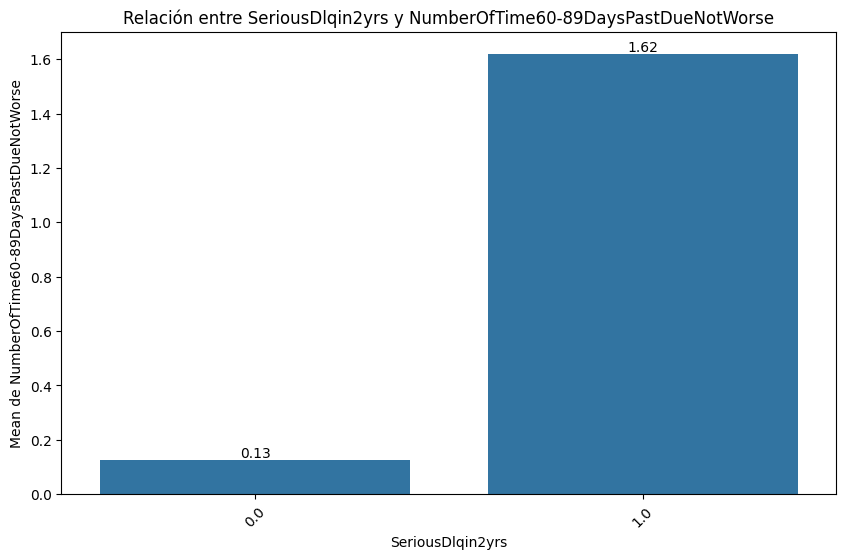

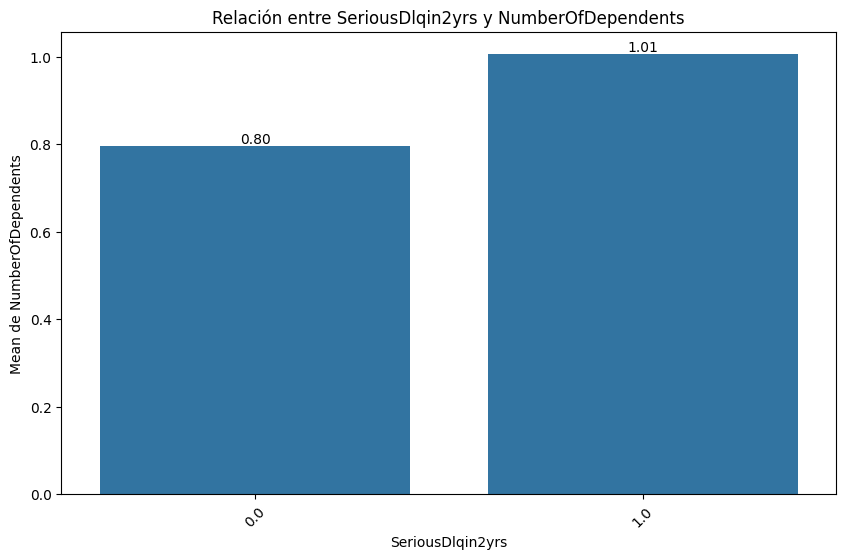

In [17]:
'''
Mini EDA
Estudio las variables numericas
'''

for col in features_num:

    bt.plot_categorical_numerical_relationship(df_banco_bkp,target, col, show_values=True)




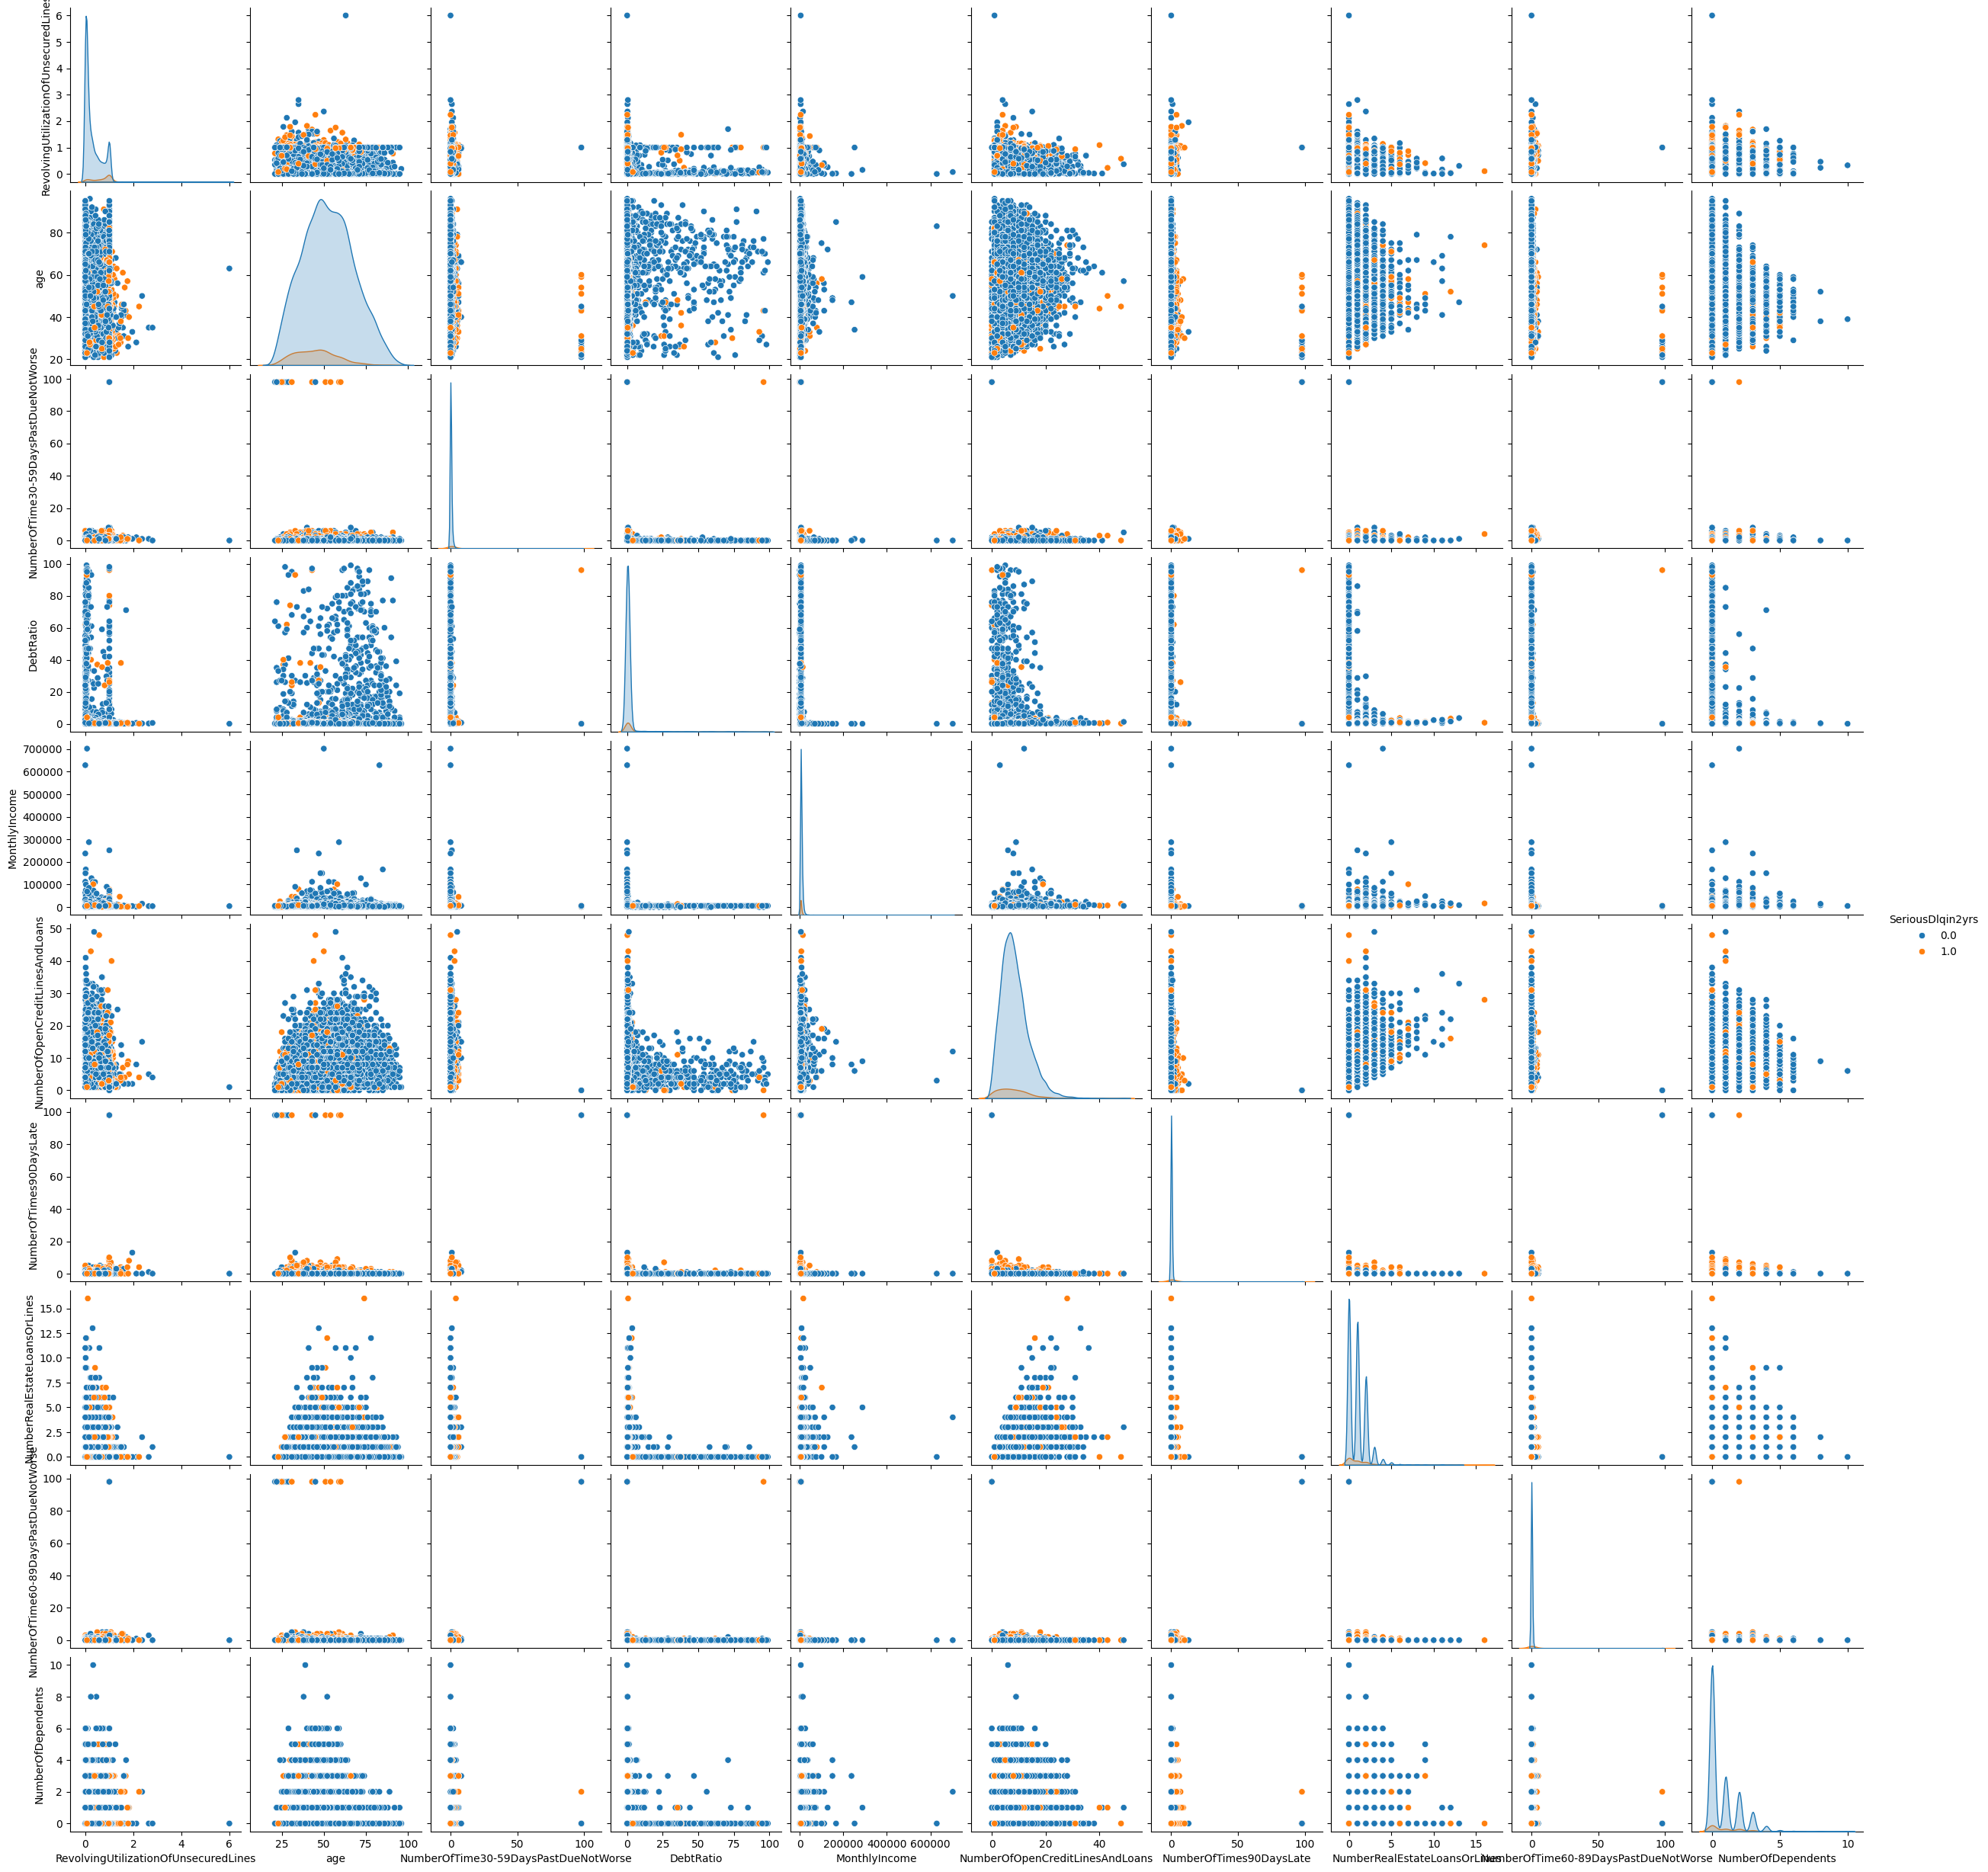

In [18]:
sns.pairplot(train_set[features_num+[target]], hue = target)

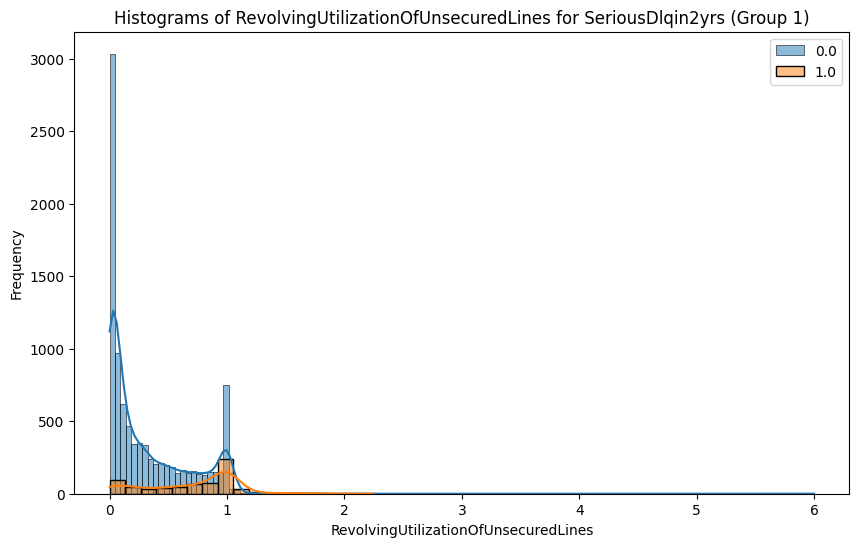

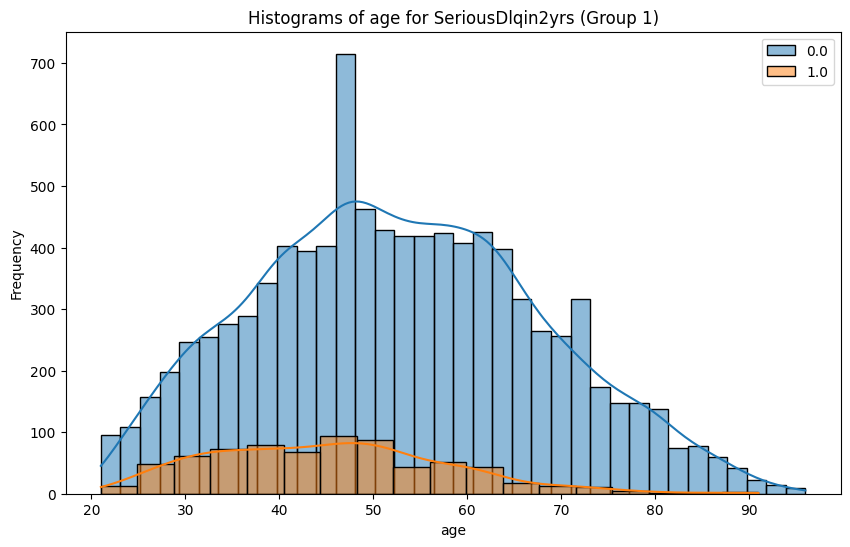

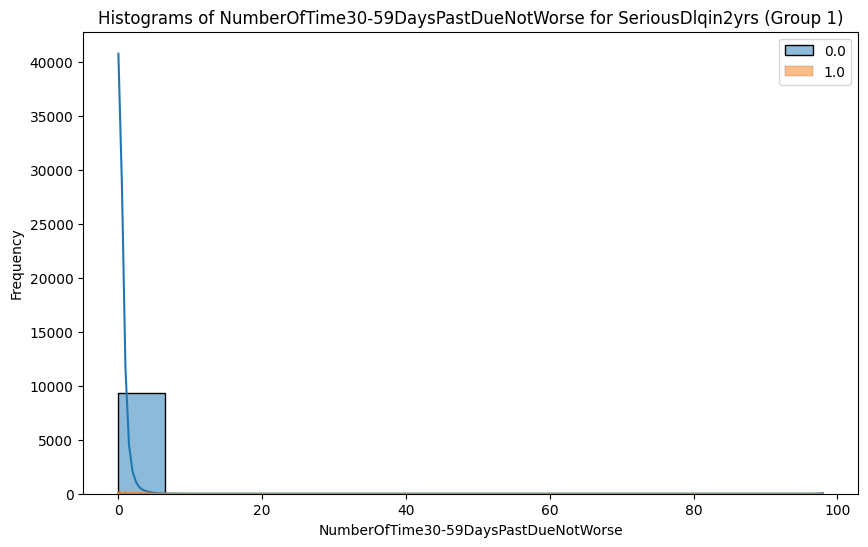

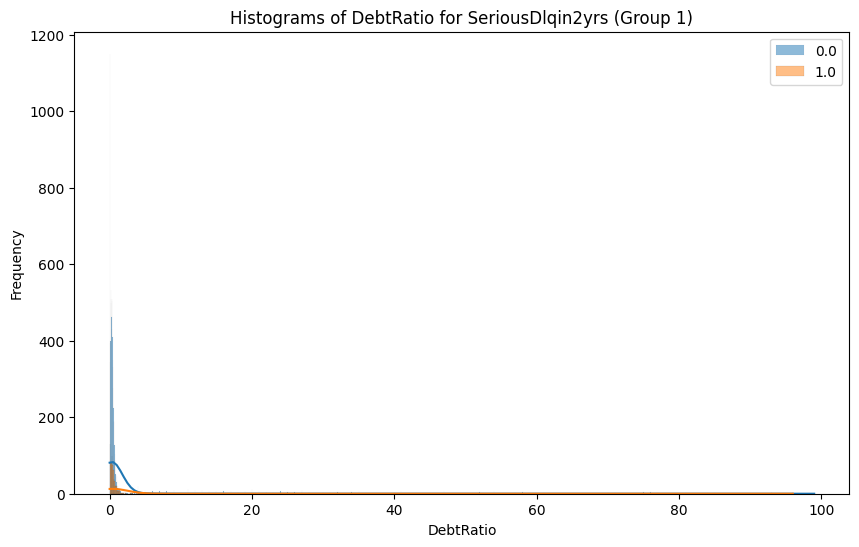

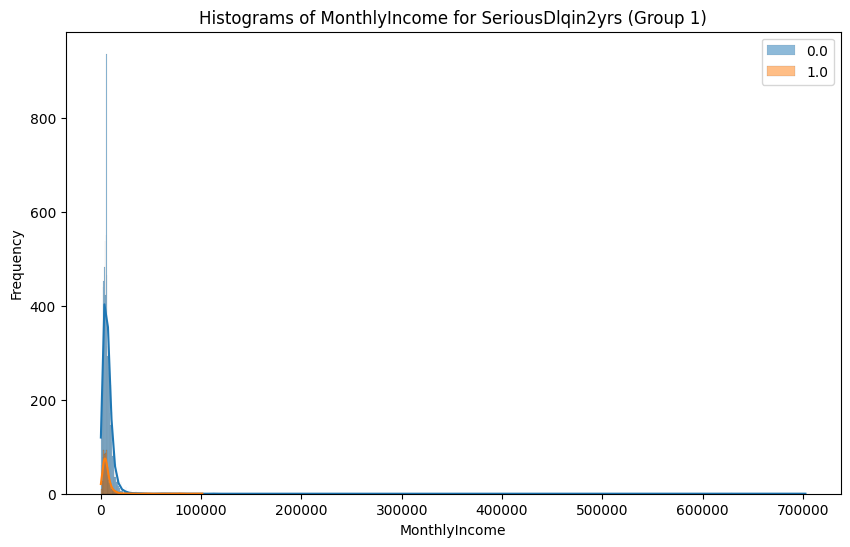

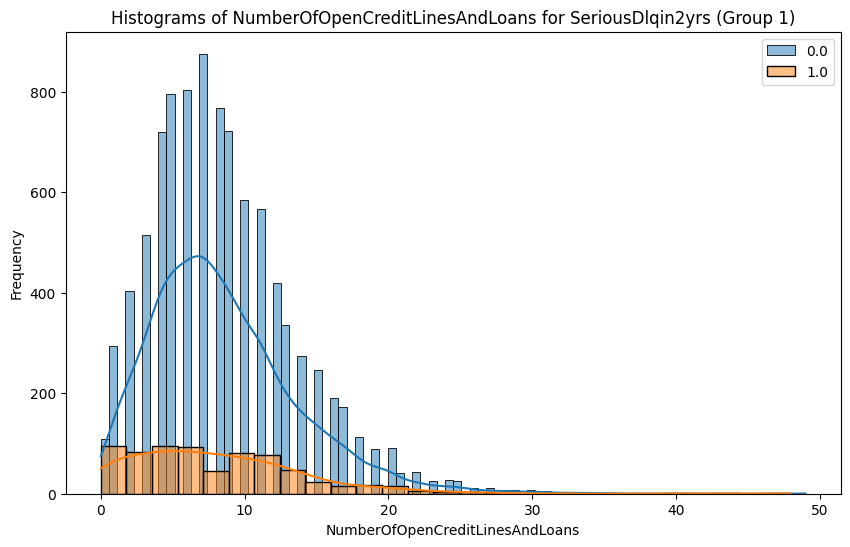

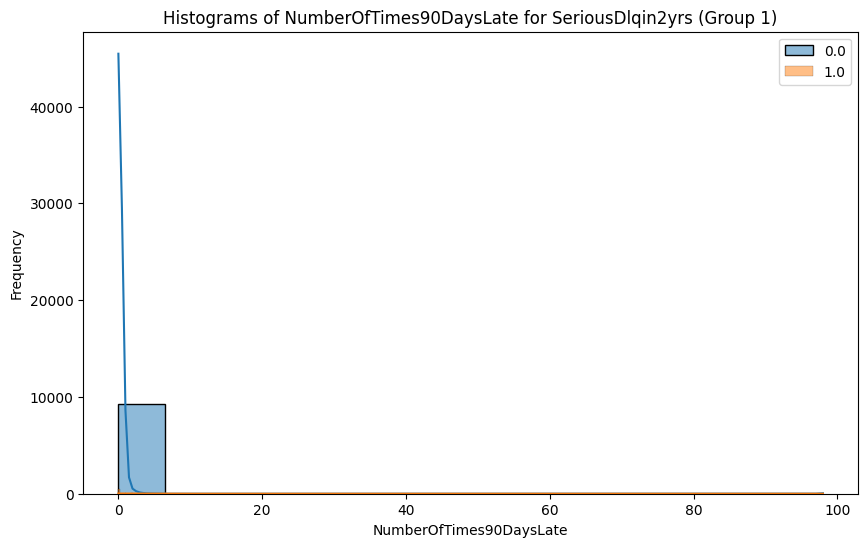

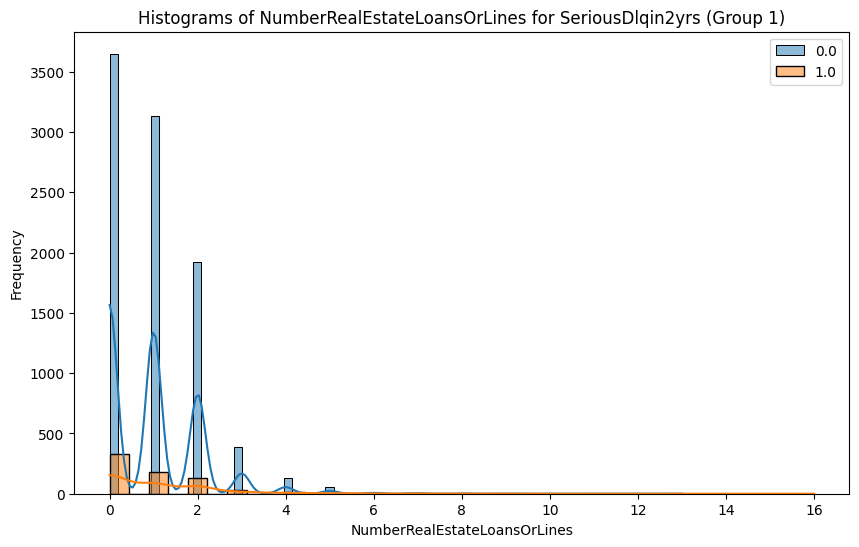

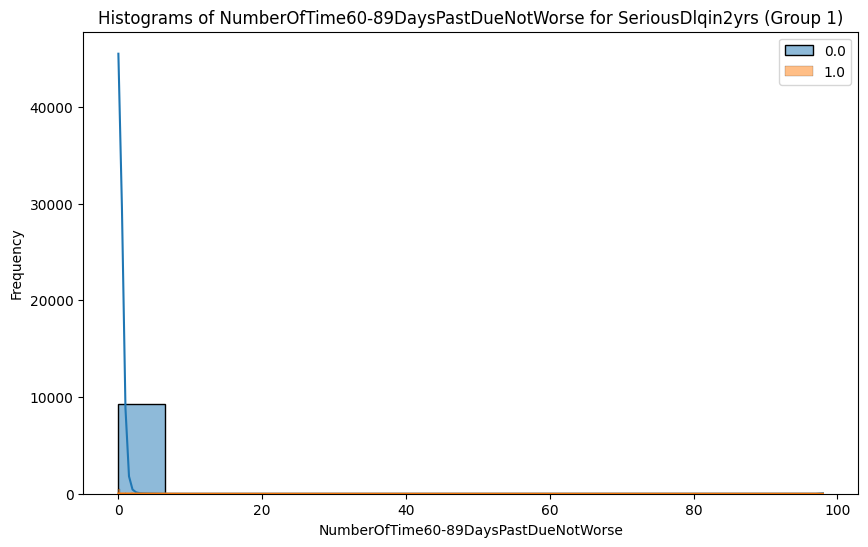

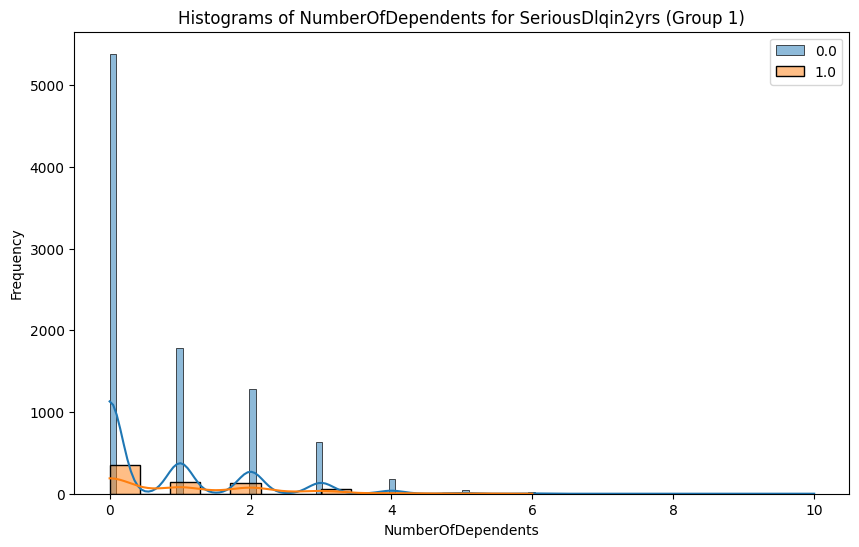

In [21]:
for col in features_num:
    bt.plot_grouped_histograms(train_set, target, col, group_size=2)

In [22]:
features_num = [col for col in features_num if col != 'NumberRealEstateLoansOrLines']

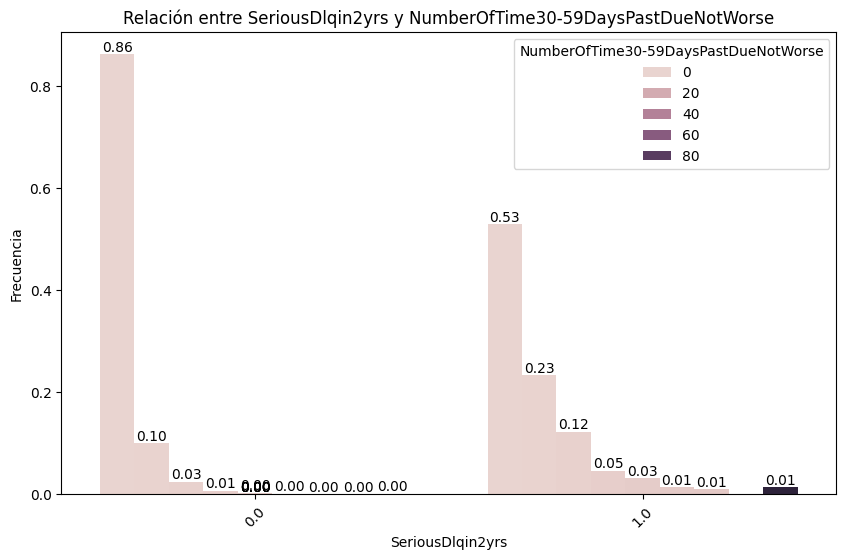

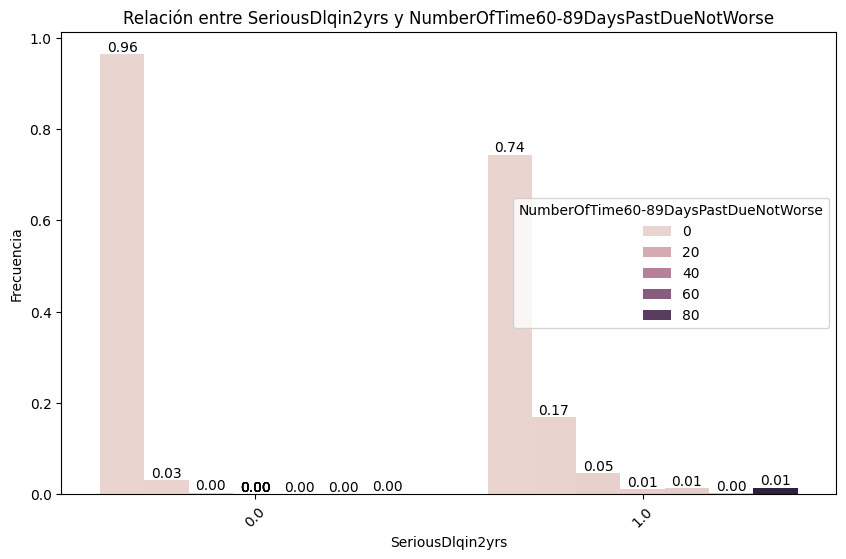

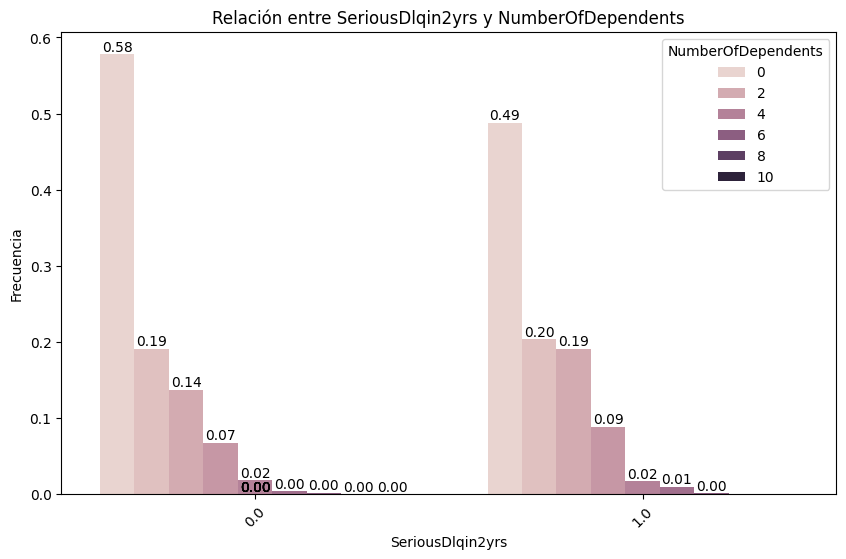

In [23]:
'''
Estudio ahor la unica variable categorica
'''
for feat in features_cat:
    bt.plot_categorical_relationship_fin(train_set, target, feat, show_values= True, relative_freq= True)

In [24]:
"""
Empiezo mi modelo, ya me quedo con todas las variables
"""

scaler = StandardScaler()
X_train[features_num] = scaler.fit_transform(X_train[features_num])
X_test[features_num] = scaler.transform(X_test[features_num])

In [25]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train[features_num], y_train)

In [26]:
y_train_res.value_counts(True)

SeriousDlqin2yrs
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

In [27]:
X_train_res.shape

(18636, 9)

In [28]:
X_train.shape

(10029, 10)

In [30]:
'''
Pasamos a definir los modelos
'''

scorer = make_scorer(recall_score, average='macro')

# Hiperparámetros para cada modelo
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9]
}

rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

logreg_param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'newton-cg', 'liblinear']
}

# Definir los modelos
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
logreg = LogisticRegression(random_state=42, class_weight='balanced')


# GridSearch para KNN
knn_grid = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=5, scoring=scorer, n_jobs=-1, verbose=1)
knn_grid.fit(X_train_res, y_train_res)

# GridSearch para Random Forest
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring=scorer, n_jobs=-1, verbose=1)
rf_grid.fit(X_train_res, y_train_res)

# GridSearch para Logistic Regression
logreg_grid = GridSearchCV(estimator=logreg, param_grid=logreg_param_grid, cv=5, scoring=scorer, n_jobs=-1, verbose=1)
logreg_grid.fit(X_train_res, y_train_res)

# Imprimir los mejores parámetros y el recall medio de cada modelo
print("Best parameters for KNN:", knn_grid.best_params_)
print("Best mean recall for KNN:", knn_grid.best_score_)

print("Best parameters for Random Forest:", rf_grid.best_params_)
print("Best mean recall for Random Forest:", rf_grid.best_score_)

print("Best parameters for Logistic Regression:", logreg_grid.best_params_)
print("Best mean recall for Logistic Regression:", logreg_grid.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for KNN: {'n_neighbors': 3}
Best mean recall for KNN: 0.9116238058049342
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best mean recall for Random Forest: 0.9506892178612649
Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best mean recall for Logistic Regression: 0.746245009548953


In [ ]:
'''
Después de realizar la optimización, seleccionaremos el modelo con el mejor recall medio en la validación cruzada y lo evaluaremos en el conjunto de prueba.
'''

Classification Report:
                 precision    recall  f1-score   support

No Dificultades       0.96      0.96      0.96      2355
   Dificultades       0.36      0.33      0.35       153

       accuracy                           0.92      2508
      macro avg       0.66      0.65      0.65      2508
   weighted avg       0.92      0.92      0.92      2508

Confusion Matrix:


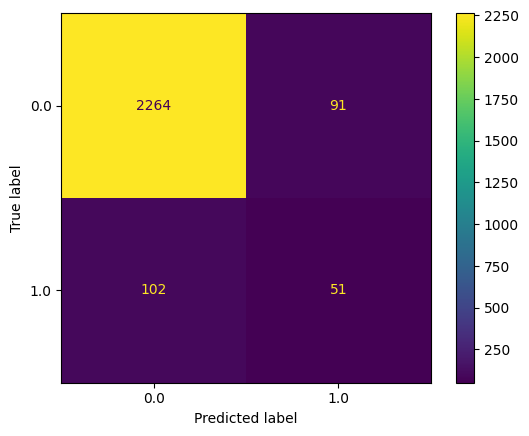

In [44]:
# Elegir el mejor modelo (en este ejemplo, supongamos que es el Random Forest)
from sklearn.metrics import classification_report, confusion_matrix
best_model = rf_grid.best_estimator_

# Predecir en los datos de prueba
y_pred = best_model.predict(X_test[features_num])

# Imprimir el informe de clasificación y matriz de confusión
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Dificultades', 'Dificultades']))

print("Confusion Matrix:")
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))